In [1]:
#
# k-means clustering
#
#     Motivating Questions:
#
#     1) Where do crimes cluster? What is the average distance 
#         of crimes in these clusters from the cluster centers? 
#
#     2) Do the neighborhoods containing these clusters have worse
#         health outcomes as measured by average life expectancy
#         and obesity?
#

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn.cluster as cluster

In [3]:
#
# Put crime.csv into Pandas DataFrame
#
crime = pd.read_csv('crime.csv')

In [4]:
#
# Create DataFrame 'violent_crime' 
#     which only contains crimes we classify as violent
#
v_crimes  = 'OFFENSE_CATEGORY_ID == "aggravated-assault"'
v_crimes += ' or OFFENSE_CATEGORY_ID == "murder"'
v_crimes += ' or OFFENSE_CATEGORY_ID == "robbery"'
v_crimes += ' or OFFENSE_CATEGORY_ID == "sexual-assault"'

violent_crime = crime.query(v_crimes)

In [5]:
#
# Remove data objects from 'violent_crime' 
#     that have no location data
#
violent_crime = violent_crime.dropna(subset=['GEO_LAT', 'GEO_LON'])

In [6]:
#
# Remove data objects with location data 
#     north of Broomfield, CO (Latitude > 40) or
#     south of Colorado Springs, CO (Latitude < 39)
#
violent_crime = violent_crime[violent_crime['GEO_LAT'].between(39,40)]

In [7]:
#
# Remove data objects with location data 
#     east of Fort Morgan, CO (Latitude > -104) or
#     west of Keystone, CO (Longitude < -106)
#
violent_crime = violent_crime[violent_crime['GEO_LON'].between(-106,-104)]

In [8]:
# 
# Initiate SKLearn's k-means algorithm
# 
kmeans = cluster.KMeans(n_clusters=5, init="k-means++")
kmeans = kmeans.fit(violent_crime[['GEO_LAT', 'GEO_LON']])

In [9]:
#
# Display cluster centers
#     Latitude longitude
#
kmeans.cluster_centers_

array([[  39.7491209 , -104.98989637],
       [  39.7866632 , -104.80448919],
       [  39.67490923, -104.90493312],
       [  39.75165549, -104.91021539],
       [  39.69805695, -105.03097974]])

In [10]:
# 
# Label each data object in the 'violent_crime' dataset
#     with the cluster to which it was assigned
#
violent_crime['CLUSTER'] = kmeans.labels_

In [11]:
#
# Display new incarnation of 'violent_crime', if desired
#
# violent_crime.head()

In [12]:
#
# How may violent crimes fall within each centroid's 
#     cluster?
#
violent_crime['CLUSTER'].value_counts()

0    9808
4    4763
3    2934
2    2247
1    1983
Name: CLUSTER, dtype: int64

<AxesSubplot:xlabel='GEO_LON', ylabel='GEO_LAT'>

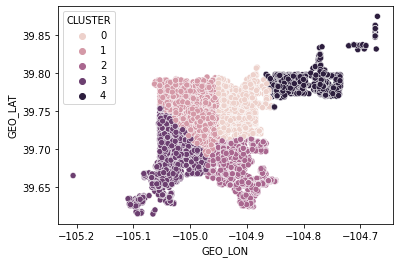

In [13]:
#
# Map on north-south, east-west axis
#
sns.scatterplot(x="GEO_LON", y="GEO_LAT", hue="CLUSTER", data=violent_crime)

In [14]:
#
# NEIGHBORHOOD LOCATIONS OF CENTROIDS
#
# Works Consulted:
# https://www.denvergov.org/maps/map/neighborhoods
#

# FIVE CENTROIDS
# 39.7866632 , -104.80448919 Centroid 0: Gateway - Green Valley Ranch
# 39.74900854, -104.99014652 Centroid 1: CBD
# 39.7517868 , -104.91051829 Centroid 2: North Park Hill
# 39.6749082 , -104.90490433 Centroid 3: Goldsmith
# 39.69769494, -105.03102782 Centroid 4: Westwood


# TEN CENTROIDS
# 39.74524034, -104.98874222 Centroid 0: CBD
# 39.78404186, -104.82937951 Centroid 1: Montbello
# 39.74677501, -104.89609453 Centroid 2: East Colfax
# 39.76010705, -104.95565055 Centroid 3: Skyland 
# 39.65988222, -105.04871571 Centroid 4: Harvey Park South
# 39.7489431 , -105.03239783 Centroid 5: Sloan Lake 
# 39.68868782, -104.93010441 Centroid 6: Virginia Village
# 39.79161422, -104.75554963 Centroid 7: Gateway - Green Valley Ranch
# 39.6989156 , -105.02183164 Centroid 8: Athmar Park
# 39.65704553, -104.88191217 Centroid 9: Hampden


# TWENTY CENTROIDS
# 39.78585817, -104.81376965 Centroid 0: Montbello
# 39.74021327, -104.97433255 Centroid 1: North Capitol Hill
# 39.69309487, -104.90877306 Centroid 2: Washington Virginia Vale
# 39.70543618, -105.03416655 Centroid 3: Westwood
# 39.73464482, -104.89139891 Centroid 4: East Colfax
# 39.77182357, -104.96583191 Centroid 5: Cole
# 39.65510311, -105.05836768 Centroid 6: Bear Valley
# 39.73581377, -105.03550215 Centroid 7: West Colfax
# 39.68107752, -105.01594027 Centroid 8: College View - South Platte
# 39.74951338, -104.99266276 Centroid 9: CBD
# 39.78082177, -104.84548289 Centroid 10: Montbello
# 39.74996903, -104.93422542 Centroid 11: South Park Hill
# 39.77220058, -105.02121984 Centroid 12: Sunnyside
# 39.77027123, -104.90147772 Centroid 13: Central Park
# 39.66180595, -104.86759861 Centroid 14: Hampden
# 39.78725971, -104.76118806 Centroid 15: Gateway - Green Valley Ranch
# 39.68385485, -104.94556329 Centroid 16: University Park
# 39.64774894, -104.90109144 Centroid 17: Hampden South
# 39.84642165, -104.68384646 Centroid 18: DIA
# 39.71945152, -104.99187198 Centroid 19: Baker